<a href="https://colab.research.google.com/github/jamesjojijacob/data-analytics-cw/blob/master/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

In [0]:
#Parsing date column of both datasets to be read as DateTime64[ns]

pdata = pd.read_csv('pollution-1.csv',parse_dates=['ReadingDateTime'])
wdata = pd.read_csv('weather-1.csv',parse_dates=['DATE'])

In [0]:
#Extracting numerical values of dew point, temperature, wind speed (converting from mps to kmph) and direction

wdata['DEW'] = wdata['DEW'].str[:-2].astype(np.float64)/10
wdata['TMP'] = wdata['TMP'].str[:-2].astype(np.float64)/10
wdata['DIR'] = wdata['WND'].str[:3].astype(np.float64)
wdata['SPD'] = (wdata['WND'].str[8:-2].astype(np.float64)/10)*3.6

#Calculating relative humidity from dew point and temperature

wdata['HUM'] = 100*(np.exp((17.625 * wdata['DEW'])/(243.04 + wdata['DEW']))/np.exp((17.625 * wdata['TMP'])/(243.04 + wdata['TMP'])))

#Replacing missing wind direction observations with nulls

wdata.DIR.replace(999,np.nan,inplace=True)

In [0]:
#Downsampling the weather dataset

wdata.index=wdata['DATE']
wdata_resampled = wdata.resample('1H').mean()[:17520]
wdata = wdata_resampled.reset_index()

In [0]:
#Joining the weather and pollution datasets

data = pd.concat([wdata['DATE'], wdata['DEW'],wdata['TMP'],wdata['DIR'],
                  wdata['SPD'],wdata['HUM'],
                  pdata.Value[pdata.Species=='NO2'].reset_index(drop=True).rename('NO2'),
                  pdata.Value[(pdata.Species=='O3')].reset_index(drop=True).rename('O3'),
                  pdata.Value[(pdata.Species=='PM2.5')].reset_index(drop=True).rename('PM25')], axis=1)

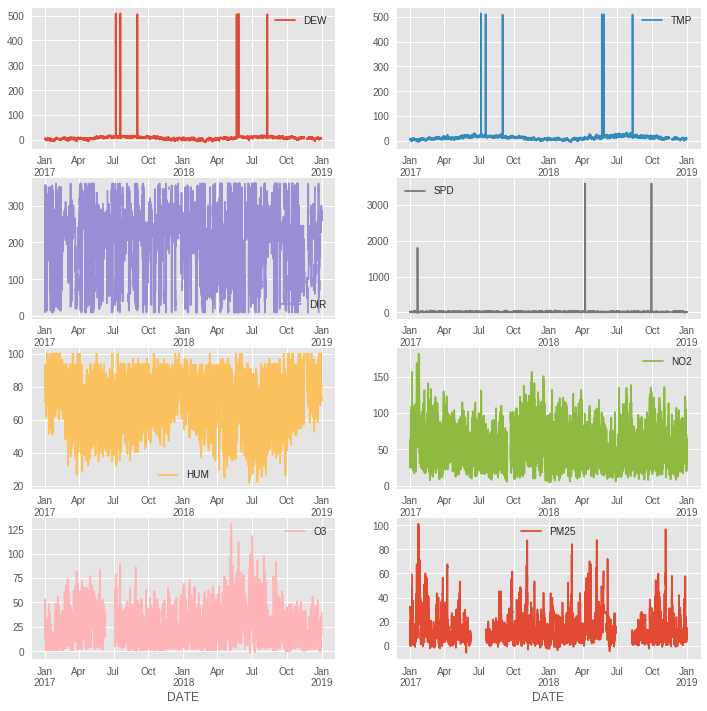

In [33]:
#Timeseries visualization of the merged dataset	
data.set_index('DATE').plot(subplots=True,layout=(4,2), figsize=(12, 12),sharex=False);

In [34]:
#Number of outliers

print('DEW:',((data['DEW'] <= -99) | (data['DEW'] >= 37)).sum())

print('TMP:',((data['TMP'] <= -94) | (data['TMP'] >= 62)).sum())

print('DIR:',((data['DIR'] < 1) | (data['DIR'] > 360)).sum())

print('SPD:',((data['SPD'] < 0) | (data['SPD'] > 324)).sum())

print('HUM:',((data['HUM'] < 0) | (data['HUM'] > 100)).sum())

print('NO2:',((data['NO2'] < 0) | (data['NO2'] > 601)).sum())

print('O3:',((data['O3'] < 0) | (data['O3'] > 241)).sum())

print('PM25:',((data['PM25'] < 0) | (data['PM25'] > 71)).sum())

DEW: 9
TMP: 9
DIR: 0
SPD: 10
HUM: 0
NO2: 0
O3: 9
PM25: 128


In [0]:
#Replacing outliers with nulls

dew_out = data.DEW[(data['DEW'] <= -99) | (data['DEW'] >= 37)]
tmp_out = data.TMP[(data['TMP'] <= -94) | (data['TMP'] >= 62)]
spd_out = data.SPD[(data['SPD'] < 0) | (data['SPD'] > 324)]
o3_out = data.O3[(data['O3'] < 0) | (data['O3'] > 241)]
pm25_out = data.PM25[(data['PM25'] < 0) | (data['PM25'] > 71)]
data.DEW.replace(dew_out,np.nan,inplace=True)
data.TMP.replace(tmp_out,np.nan,inplace=True)
data.SPD.replace(spd_out,np.nan,inplace=True)
data.O3.replace(o3_out,np.nan,inplace=True)
data.PM25.replace(pm25_out,np.nan,inplace=True)

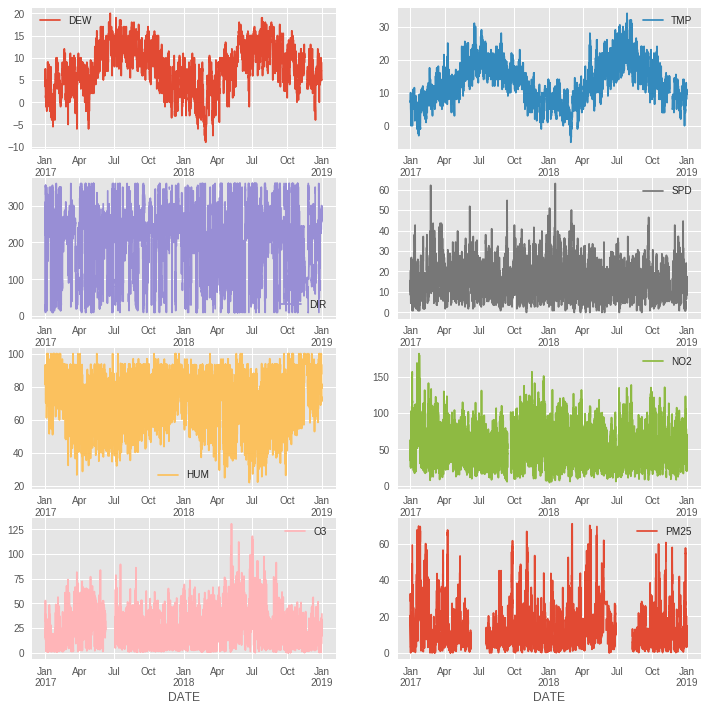

In [36]:
#Visualization after handling outliers:
data.set_index('DATE').plot(subplots=True,layout=(4,2), figsize=(12, 12),sharex=False);

In [0]:
# Add code here to fill null values

In [0]:
#Adding date features
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data['HOUR'] = pd.DatetimeIndex(data['DATE']).hour
data['DAY'] = data['DATE'].dt.weekday_name
data['DAY_CAT'] = data.DAY.astype("category").cat.codes

In [0]:
# Adding time shifted features
## This is done before removing nulls so that the dataset is continuous
### To be cleaned up into a function

data['DEW_1'] = data.DEW.shift(periods=1)
data['TMP_1'] = data.TMP.shift(periods=1)
data['DIR_1'] = data.DIR.shift(periods=1)
data['SPD_1'] = data.SPD.shift(periods=1)
data['HUM_1'] = data.HUM.shift(periods=1)
data['NO2_1'] = data.NO2.shift(periods=1)
data['O3_1'] = data.O3.shift(periods=1)
data['PM25_1'] = data.PM25.shift(periods=1)

data['DEW_2'] = data.DEW.shift(periods=2)
data['TMP_2'] = data.TMP.shift(periods=2)
data['DIR_2'] = data.DIR.shift(periods=2)
data['HUM_2'] = data.HUM.shift(periods=2)
data['SPD_2'] = data.SPD.shift(periods=2)
data['NO2_2'] = data.NO2.shift(periods=2)
data['O3_2'] = data.O3.shift(periods=2)
data['PM25_2'] = data.PM25.shift(periods=2)

data['DEW_3'] = data.DEW.shift(periods=3)
data['TMP_3'] = data.TMP.shift(periods=3)
data['DIR_3'] = data.DIR.shift(periods=3)
data['HUM_3'] = data.HUM.shift(periods=3)
data['SPD_3'] = data.SPD.shift(periods=3)
data['NO2_3'] = data.NO2.shift(periods=3)
data['O3_3'] = data.O3.shift(periods=3)
data['PM25_3'] = data.PM25.shift(periods=3)

data['DEW_4'] = data.DEW.shift(periods=4)
data['TMP_4'] = data.TMP.shift(periods=4)
data['DIR_4'] = data.DIR.shift(periods=4)
data['HUM_4'] = data.HUM.shift(periods=4)
data['SPD_4'] = data.SPD.shift(periods=4)
data['NO2_4'] = data.NO2.shift(periods=4)
data['O3_4'] = data.O3.shift(periods=4)
data['PM25_4'] = data.PM25.shift(periods=4)

data['DEW_5'] = data.DEW.shift(periods=5)
data['TMP_5'] = data.TMP.shift(periods=5)
data['DIR_5'] = data.DIR.shift(periods=5)
data['HUM_5'] = data.HUM.shift(periods=5)
data['SPD_5'] = data.SPD.shift(periods=5)
data['NO2_5'] = data.NO2.shift(periods=5)
data['O3_5'] = data.O3.shift(periods=5)
data['PM25_5'] = data.PM25.shift(periods=5)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 53 columns):
DATE       17520 non-null datetime64[ns]
DEW        17221 non-null float64
TMP        17221 non-null float64
DIR        16557 non-null float64
SPD        17220 non-null float64
HUM        17230 non-null float64
NO2        17144 non-null float64
O3         16759 non-null float64
PM25       14659 non-null float64
MONTH      17520 non-null int64
HOUR       17520 non-null int64
DAY        17520 non-null object
DAY_CAT    17520 non-null int8
DEW_1      17220 non-null float64
TMP_1      17220 non-null float64
DIR_1      16556 non-null float64
SPD_1      17219 non-null float64
HUM_1      17229 non-null float64
NO2_1      17143 non-null float64
O3_1       16758 non-null float64
PM25_1     14658 non-null float64
DEW_2      17219 non-null float64
TMP_2      17219 non-null float64
DIR_2      16555 non-null float64
HUM_2      17228 non-null float64
SPD_2      17218 non-null float64
NO2_2   

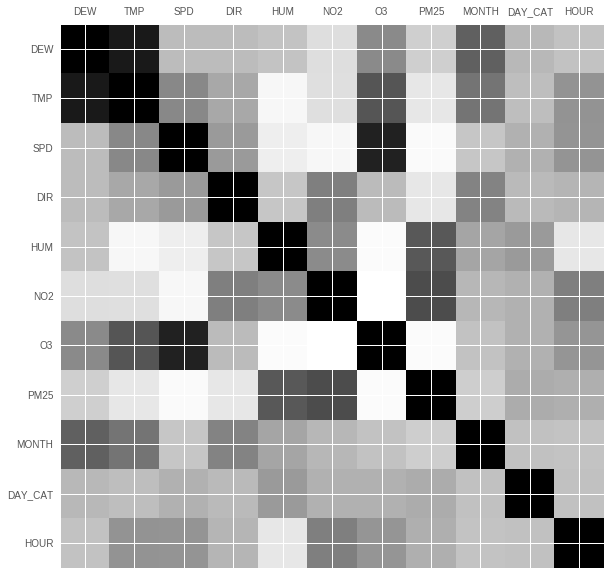

In [64]:
#Correlation_Matrix

data_corr = data[['DEW','TMP','SPD','DIR','HUM','NO2','O3','PM25','MONTH','DAY_CAT','HOUR']].corr()

def plot_corr_matrix(data, size=10):
    corr = data.corr()
    figure, axes = plt.subplots(figsize=(size, size))
    axes.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 
    
plot_corr_matrix(data_corr)

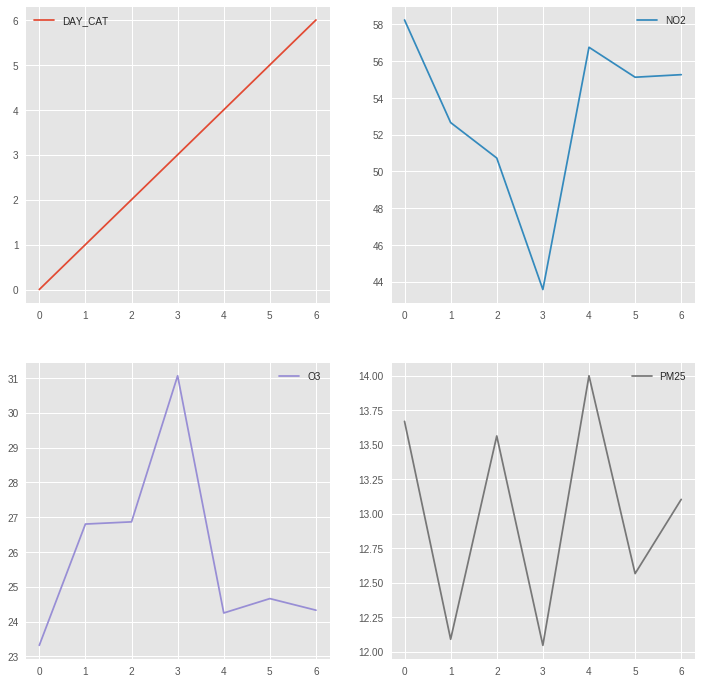

In [78]:
#Visualization of mean of features based on day of the week

mean_plot_data = data[['NO2','O3','PM25','DAY_CAT']].groupby('DAY_CAT').apply(lambda x:x.mean())
mean_plot_data.drop('DAY_CAT',axis=1).reset_index().plot(subplots=True,layout=(2,2), figsize=(12, 12),sharex=False);

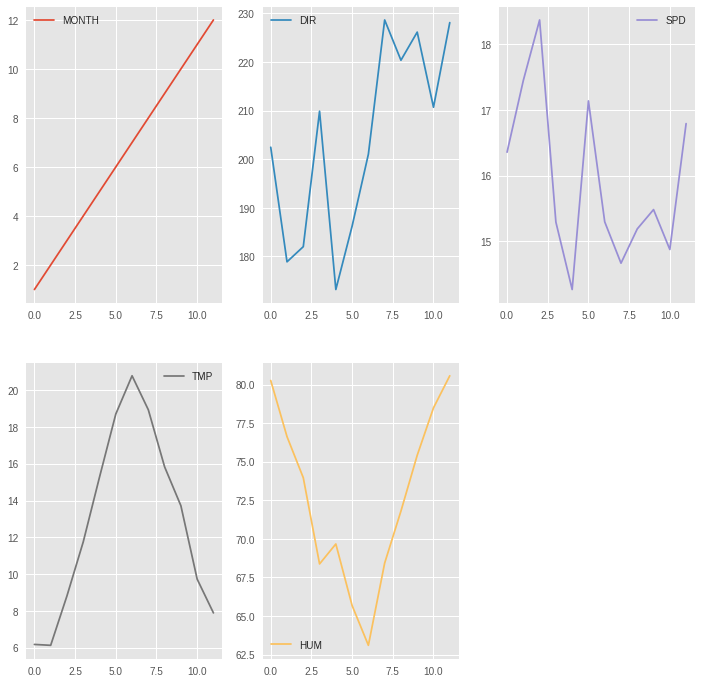

In [82]:
#Visualization of mean of features based on month of the year

mean_plot_data = data[['DIR','SPD','TMP','HUM','MONTH']].groupby('MONTH').apply(lambda x:x.mean())
mean_plot_data.drop('MONTH',axis=1).reset_index().plot(subplots=True,layout=(2,3), figsize=(12, 12),sharex=False);

In [0]:
#Checking number of null values


data.isna().sum()

In [0]:
#Percentage of null values in final dataset

data.isna().mean().round(4) * 100

In [0]:
# Show rows where any cell has a NaN
data[data.isnull().any(axis=1)].shape

(6375, 53)

In [0]:
#dropping all null values

data_dropped = data.dropna(axis=0).reset_index(drop=True)

In [0]:
#dropping unwanted columns to create final dataset for model
data_final_dropped = data_dropped.drop(['DATE','DAY'], axis=1)

In [0]:
data_final_dropped.to_csv('final-dropped.csv',index=False)

In [0]:
data.to_csv('final-visualization.csv',index=False)